y=ax+b for DUT 10,
a=-0.0003±0.0
b=0.0028±0.0
y=ax+b for DUT 150,
a=-0.0003±0.0
b=0.01±0.0
y=ax+b for DUT 220,
a=-0.0003±0.0
b=0.0135±0.0
y=ax+b for DUT 330,
a=-0.0003±0.0
b=0.0192±0.0
y=ax+b for DUT 470,
a=-0.0003±0.0
b=0.0266±0.0
y=ax+b for DUT 510,
a=-0.0003±0.0
b=0.0288±0.0
y=ax+b for DUT 1000,
a=-0.0003±0.0
b=0.054±0.0


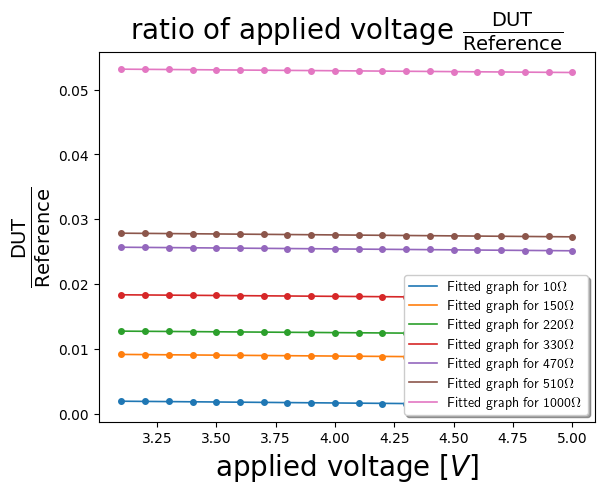

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib
import pickle
res1 = 19295.6601
res2 = [10, 150, 220, 330, 470, 510, 1000]
parameters = []
color1=0
fig, ax = plt.subplots()
def func(x, A, B):
    return A*x+ B
for ohm in res2:
    with open("step1_ex1_res_"+str(ohm)+'.pkl',"rb") as handle:
        A = pickle.load(handle)
#print(A)
    n = len(A)      # number of voltage
    m = len(A.get(list(A.keys())[0]))       # number of measurement in each voltage
#print(n,m)
    mean = []
    std = []
    for i in range(n):
        C =[]      
        for j in range(m):
            ratio = A.get(list(A.keys())[i])[j][0]/A.get(list(A.keys())[i])[j][1]      # generate list[mean of V_1, mean of V_2]
            C.append(ratio)
        mean.append(np.mean(C))
        std.append(np.std(C, ddof = 1)/((m)**0.5))
        #C[list(A.keys())[i]] = [mean[0]/mean[1], mean[0]/mean[1]*((std[0]/mean[0])**2+(std[1]/mean[1])**2)**0.5]         # generate pair input voltage : [V_1/V_2, 1 sigma error]
    voltage = np.linspace(0.1,5,num=50)
            

#print(D)
    x = voltage[30:]
    y = mean[30:]
    stdv = std[30:]
    popt, pcov = curve_fit(func, x, y)
    parameters.append([ohm, round(popt[0], 4), round(pcov[0][0]**0.5, 4), round(popt[1], 4), round(pcov[1][1]**0.5)])
    #print('DUT is '+str(ohm))
    #print("params:\n", popt)
    #print("covariance:\n", pcov)
    print('y=ax+b for DUT '+str(ohm)+','+'\na='+str(round(popt[0], 4))+'±'+str(round(pcov[0][0]**0.5, 4))+'\nb='+str(round(popt[1], 4))+'±'+str(round(pcov[1][1]**0.5, 4)))
    a, b= popt[0], popt[1]
    yfit = a*x+b
    max = list(A.keys())[-1]
    color2='C'+str(color1)
    ax.plot(x, func(x, a, b),
        linestyle="-",
        linewidth=1.2,
        color=color2,
        label="Fitted graph for "+ str(ohm) +r"$\Omega$")

    ax.errorbar(x, y, yerr=stdv,
        marker='o',
        markersize=4,
        linestyle="None",
        elinewidth=1.2,
        capsize=1.5,
        capthick=1.2,
        color=color2)
        #label="Data point for"+ str(ohm) +r"$\Omega$")
    color1+=1
#textstr = 'Reference resistor: '+str(res1)+'\nDUT: '+str(res2)+'\nFitting function: y=ax+b'+'\na='+str(round(popt[0], 4))+r'$\pm$'+str(round(pcov[0][0]**0.5, 4))+'\nb='+str(round(popt[1], 4))+r'$\pm$'+str(round(pcov[1][1]**0.5, 4))
#textbox = matplotlib.offsetbox.AnchoredText(textstr, loc='upper right')
#ax.add_artist(textbox)

plt.rc('text', usetex = True)
#plt.xkcd()
plt.title(r'ratio of applied voltage $\frac{\mathrm{DUT}}{\mathrm{Reference}}$', fontsize = 20)

plt.ylabel(r'$\frac{\mathrm{DUT}}{\mathrm{Reference}}$', fontsize = 20)
plt.xlabel(r'applied voltage [$V$]', fontsize = 20)
plt.legend(loc='lower right', fancybox=True, shadow=True)
plt.grid(False)
plt.savefig('Fitted graph for various DUT.png')
plt.show()